In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('downloads/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
df = df.dropna(axis=0)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
date = le.fit_transform(df['Date'])
wind = le.fit_transform(df['WindGustDir'].astype(str))
wind9 = le.fit_transform(df['WindDir9am'].astype(str))
wind3 = le.fit_transform(df['WindDir3pm'].astype(str))


In [4]:
df['Date']=date
df['WindGustDir'] = wind
df['WindDir9am'] = wind9
df['WindDir3pm'] = wind3

In [5]:
mapping = {'Yes':1,'No': 0}
df['RainTomorrow'] = df['RainToday'].map(mapping)
df['RainToday'] = df['RainToday'].map(mapping)

In [6]:
dummyLoc = pd.get_dummies(df['Location'])
merged = pd.concat([df,dummyLoc],axis='columns')
df = merged



In [7]:
y =  df['RainTomorrow']
df = df.drop('RainTomorrow',axis=1)
df = df.drop('Location',axis=1)
x = df
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = ['MinTemp', 'MaxTemp', 'Rainfall'
       , 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RISK_MM']
for col in cols:
    df[col]= scaler.fit_transform(df[col].values.reshape(-1,1))
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,PerthAirport,Portland,Sale,Sydney,SydneyAirport,Townsville,WaggaWagga,Watsonia,Williamtown,Woomera
5939,407,0.645669,0.706818,0.0,12.0,12.3,11,0.339130,1,12,...,0,0,0,0,0,0,0,0,0,0
5940,408,0.658793,0.563636,0.0,14.8,13.0,8,0.243478,10,10,...,0,0,0,0,0,0,0,0,0,0
5942,410,0.685039,0.761364,0.0,10.8,10.6,5,0.321739,5,6,...,0,0,0,0,0,0,0,0,0,0
5943,411,0.750656,0.779545,0.0,11.4,12.2,14,0.191304,14,15,...,0,0,0,0,0,0,0,0,0,0
5944,412,0.811024,0.838636,0.0,11.2,8.4,14,0.226087,7,14,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,3410,0.682415,0.665909,0.0,6.0,11.0,1,0.226087,9,4,...,0,0,0,0,0,0,0,0,0,0
139109,3411,0.732283,0.647727,0.0,7.6,8.6,0,0.243478,9,9,...,0,0,0,0,0,0,0,0,0,0
139110,3412,0.719160,0.652273,0.0,5.6,11.0,0,0.208696,0,13,...,0,0,0,0,0,0,0,0,0,0
139111,3413,0.687664,0.629545,0.0,6.2,10.6,2,0.147826,9,6,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=0)


In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
Gaussmodel = GaussianNB()

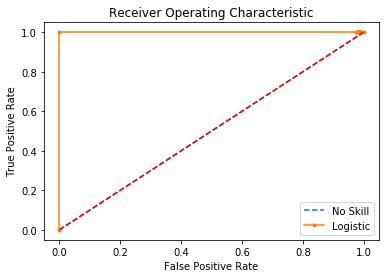

In [12]:
Gaussmodel.fit(X_train,y_train)
pred_1 = Gaussmodel.predict(X_test)
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
probs = Gaussmodel.predict_proba(X_test)

ns_probs = [0 for _ in range(len(y_test))]
preds = probs[:,1]


lr_fpr, lr_tpr, _ = roc_curve(y_test, preds)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')


plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.legend()
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#print(metrics.accuracy_score(y_test, pred_1))
#print(metrics.accuracy_score(y_test, pred_1))
#print(metrics.accuracy_score(y_test, pred_1))

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


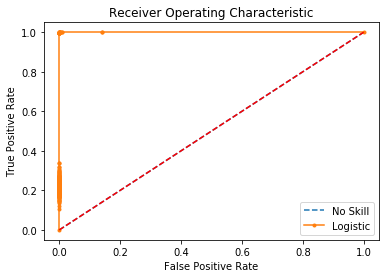

0.9994239631336406


In [13]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression(C=100.0, random_state=1)
logModel.fit(X_train,y_train)
pred_2 = logModel.predict(X_test)

probs = logModel.predict_proba(X_test)

ns_probs = [0 for _ in range(len(y_test))]
preds = probs[:,1]


lr_fpr, lr_tpr, _ = roc_curve(y_test, preds)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')


plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.legend()
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(metrics.accuracy_score(y_test, pred_2))

In [14]:
from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(X_train,y_train)
pred_3 = svm.predict(X_test)

print(metrics.accuracy_score(y_test, pred_3))

0.8176178660049628
